# Detect anomalies using SAX and N-grams in one signal

## Import and input

In [2]:
import pandas as pd
from saxpy.sax import *
import numpy as np
from matplotlib import pyplot as plt

train1 = pd.read_csv('../data/training_1.csv')
train2 = pd.read_csv('../data/training_2.csv')

# store all time points of known attacks
labels = list(train2.loc[train2['ATT_FLAG']==1].index)

## Define the procedure that computes the N-gram probabilities

In [3]:
def ngram_probabilities(n_grams):
    acc = 0
    ngram_probs = {}
    
    # compute how many times an ngram apppears in the data
    for i in n_grams:
        ngram_probs[i] = len(sax1[i])
        acc = acc + ngram_probs[i]
    
    # divide by the total number of ngrams to get a probability
    for i in n_grams:
        ngram_probs[i] /= acc
        
    return ngram_probs

## Discretize data and visualization

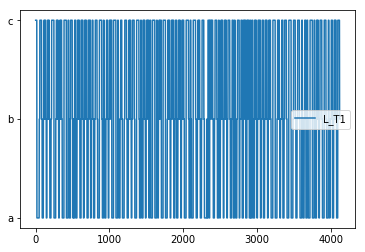

In [4]:
# initialize sax parameters
window = 49
paa = 8
alpha = 3
sensor = 'L_T1'

# perform discretization for training set 1
sax1 = sax_via_window(np.array(train1[sensor]), window, paa, alpha, "none", 0.01)


# create visualization of discrete values
symbol_to_number = {'a':1, 'b':2,'c':3}
discrete = []

for i in range(0,len(train1[sensor]),paa):
    for gram in list(sax1.keys()):
        if i in sax1[gram]:
            for k in range(0,paa):
                discrete.append(symbol_to_number[gram[0]])
            break
   
plt.plot(np.array(discrete))
plt.yticks(np.array([x for x in range(1,alpha+1)]),('a','b','c'))
plt.legend([sensor])
plt.show()

## Compute N-gram probabilities for training set 1 and training set 2

In [5]:
# store all ngrams found in training set 1
n_grams = list(sax1.keys())

# compute ngram probabilities
ngram_probs = ngram_probabilities(n_grams)

# discretize training set 2
sax2 = sax_via_window(np.array(train2[sensor]),window,paa,alpha,"none",0.01)

# repeat procedure for training set 2
n_grams2 = list(sax2.keys())

ngram_probs2 = ngram_probabilities(n_grams2)

## Anomaly detection

In [6]:
# use rule for detecting anomalies
detected_indices = []
possible_anomalies = set()

for ngram in n_grams2:
    if ngram not in n_grams:
        detected_indices.append(sax2[ngram])
   
# compute evaluation metrics     
TP = 0
FP = 0

for index_list in detected_indices:
    for i in index_list:
        possible_anomalies.add(i)
            

for i in list(possible_anomalies):
    if i in labels:
        TP +=1         
    else:
        FP += 1
        
print(TP)
print(FP)

0
170
